Q1. Describe the decision tree classifier algorithm and how it works to make predictions.

In [1]:
import numpy as np

# Sample dataset for binary classification
X = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
y = np.array([0, 1, 1, 1, 0, 0])  # Binary labels (0 or 1)

# Define the DecisionTreeClassifier class
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        unique_classes, counts = np.unique(y, return_counts=True)
        predicted_class = unique_classes[np.argmax(counts)]

        # If stopping conditions are met, create a leaf node
        if len(unique_classes) == 1 or depth == self.max_depth:
            return {'predicted_class': predicted_class}

        # Find the best split based on information gain
        best_split_feature, best_split_value = self.find_best_split(X, y)

        # Split the data
        left_indices = X[:, best_split_feature] <= best_split_value
        right_indices = ~left_indices

        # Create a decision node
        decision_node = {
            'split_feature': best_split_feature,
            'split_value': best_split_value,
            'left': self.fit(X[left_indices], y[left_indices], depth + 1),
            'right': self.fit(X[right_indices], y[right_indices], depth + 1)
        }

        return decision_node

    def find_best_split(self, X, y):
        # Calculate impurity for the current node
        current_impurity = self.calculate_impurity(y)

        # Initialize variables to store best split information
        best_split_feature = None
        best_split_value = None
        best_information_gain = 0

        # Iterate over features and their unique values to find the best split
        for feature_index in range(X.shape[1]):
            unique_values = np.unique(X[:, feature_index])
            for value in unique_values:
                # Split the data based on the current feature and value
                left_indices = X[:, feature_index] <= value
                right_indices = ~left_indices

                # Calculate information gain
                information_gain = self.calculate_information_gain(y, left_indices, right_indices)

                # Update best split if the current one is better
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_split_feature = feature_index
                    best_split_value = value

        return best_split_feature, best_split_value

    def calculate_impurity(self, y):
        # Gini impurity for binary classification
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        impurity = 1 - np.sum(probabilities ** 2)
        return impurity

    def calculate_information_gain(self, y, left_indices, right_indices):
        # Calculate information gain based on Gini impurity
        current_impurity = self.calculate_impurity(y)
        left_impurity = self.calculate_impurity(y[left_indices])
        right_impurity = self.calculate_impurity(y[right_indices])

        # Weighted sum of impurities for left and right splits
        weighted_impurity = (len(y[left_indices]) / len(y)) * left_impurity + \
                            (len(y[right_indices]) / len(y)) * right_impurity

        information_gain = current_impurity - weighted_impurity
        return information_gain

# Instantiate the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=2)

# Train the decision tree on the dataset
decision_tree = tree_classifier.fit(X, y)

# Print the decision tree structure
print(decision_tree)


{'split_feature': 1, 'split_value': 3, 'left': {'predicted_class': 0}, 'right': {'predicted_class': 1}}


**This example includes the implementation of a basic decision tree classifier in Python. The DecisionTreeClassifier class has methods for fitting the model (fit), finding the best split (find_best_split), and calculating impurity and information gain. The code uses a simple binary classification dataset with two features. The resulting decision tree structure is printed at the end. Note that this is a basic example, and real-world implementations may include additional optimizations and features.**

Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.

#### Explanation:

**The decision tree classification algorithm involves recursively partitioning the input space based on features to create a tree structure. The goal is to maximize information gain or minimize impurity at each split. Here's a step-by-step explanation:**

#### 1. Calculate Impurity:

- The impurity of a node is a measure of the uncertainty or disorder in the data at that node. Common impurity measures include Gini impurity and entropy.
- For Gini impurity (used in the code below), it is calculated as i in the node.
#### Find the Best Split:

- Iterate over each feature and its unique values.
- For each feature value, split the data into left and right subsets.
- Calculate the weighted impurity after the split.
- Choose the split that maximizes information gain (or minimizes impurity).

#### Create Decision Nodes:

- Recursively apply the process to each child node.
- Stop the recursion when a predefined stopping criterion is met, such as reaching a maximum depth.

**Python Code:**

In [2]:
import numpy as np

# Sample dataset for binary classification
X = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
y = np.array([0, 1, 1, 1, 0, 0])  # Binary labels (0 or 1)

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        # Calculate impurity for the current node
        current_impurity = self.calculate_impurity(y)

        # If stopping conditions are met, create a leaf node
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return {'predicted_class': np.unique(y)[0]}

        # Find the best split based on information gain
        best_split_feature, best_split_value = self.find_best_split(X, y)

        # Split the data
        left_indices = X[:, best_split_feature] <= best_split_value
        right_indices = ~left_indices

        # Create a decision node
        decision_node = {
            'split_feature': best_split_feature,
            'split_value': best_split_value,
            'left': self.fit(X[left_indices], y[left_indices], depth + 1),
            'right': self.fit(X[right_indices], y[right_indices], depth + 1)
        }

        return decision_node

    def calculate_impurity(self, y):
        # Gini impurity for binary classification
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        impurity = 1 - np.sum(probabilities ** 2)
        return impurity

    def find_best_split(self, X, y):
        # Calculate impurity for the current node
        current_impurity = self.calculate_impurity(y)

        # Initialize variables to store best split information
        best_split_feature = None
        best_split_value = None
        best_information_gain = 0

        # Iterate over features and their unique values to find the best split
        for feature_index in range(X.shape[1]):
            unique_values = np.unique(X[:, feature_index])
            for value in unique_values:
                # Split the data based on the current feature and value
                left_indices = X[:, feature_index] <= value
                right_indices = ~left_indices

                # Calculate information gain
                information_gain = current_impurity - self.calculate_weighted_impurity(y, left_indices, right_indices)

                # Update best split if the current one is better
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_split_feature = feature_index
                    best_split_value = value

        return best_split_feature, best_split_value

    def calculate_weighted_impurity(self, y, left_indices, right_indices):
        # Calculate weighted impurity after a split
        left_impurity = self.calculate_impurity(y[left_indices])
        right_impurity = self.calculate_impurity(y[right_indices])

        # Weighted sum of impurities for left and right splits
        weighted_impurity = (len(y[left_indices]) / len(y)) * left_impurity + \
                            (len(y[right_indices]) / len(y)) * right_impurity

        return weighted_impurity

# Instantiate the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=2)

# Train the decision tree on the dataset
decision_tree = tree_classifier.fit(X, y)

# Print the decision tree structure
print(decision_tree)


{'split_feature': 1, 'split_value': 3, 'left': {'predicted_class': 0}, 'right': {'predicted_class': 1}}


Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.

#### Explanation:

**A decision tree classifier can be used to solve a binary classification problem by recursively partitioning the input space based on features until a stopping criterion is met. During the training phase, the algorithm learns to make decisions at each node of the tree, ultimately assigning a class label to each leaf node. Here's how it works:**

#### Tree Construction:

- Start with the entire dataset at the root node.
- Select the best feature and value to split the data, aiming to maximize information gain or minimize impurity.
- Create two child nodes representing the subsets of data resulting from the split.
- Repeat this process recursively for each child node until a stopping criterion is met (e.g., maximum depth or a minimum number of instances in a node).
#### Decision Making:

- During prediction, a new instance traverses the tree from the root to a leaf node.
- At each node, the instance's feature value is compared with the split value.
- The instance moves to the left or right child node based on this comparison.
- This process continues until the instance reaches a leaf node, and the majority class in that leaf is assigned as the predicted class.

#### Class Labels:

- Each leaf node in the decision tree represents a specific combination of feature values.
- The class label assigned to a leaf node is often determined by the majority class of instances in that node during the training phase.
- This majority class becomes the predicted class for instances that reach that leaf during prediction.

**Python Code Example:**

##### Below is a Python code snippet demonstrating the use of a decision tree classifier for a binary classification problem:

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample binary classification dataset
X = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
y = np.array([0, 1, 1, 1, 0, 0])  # Binary labels (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.50


**In this example, a decision tree classifier is trained on a small dataset, and its accuracy is evaluated on a test set. The DecisionTreeClassifier from scikit-learn is used for simplicity. In a real-world scenario, you might tune hyperparameters and use more extensive datasets for training and evaluation.**







Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make
predictions.

#### Explanation:

**The geometric intuition behind decision tree classification involves visualizing how the algorithm divides the input space into regions or decision boundaries. Each decision boundary corresponds to a split in the feature space, and the resulting tree structure represents a partitioning of the space into regions associated with different classes.**

##### Here's how the geometric intuition is related to making predictions:

#### ecision Boundaries:

- At each node of the decision tree, a decision is made based on a specific feature and its threshold value.
- The decision boundary associated with that node divides the feature space into two regions: one where the condition is true (left child) and another where the condition is false (right child).

#### Recursive Partitioning:

- As the algorithm recursively creates decision nodes, it further divides the space into finer regions.
- The final decision boundaries are formed by the combination of all these splits in the feature space.

#### Prediction Process:

- During prediction, a new instance is introduced into the feature space.
- The instance follows the decision boundaries from the root of the tree to a leaf node.
- The class label associated with the majority of instances in that leaf node becomes the predicted class for the new instance.

#### Interpretability:

- Decision trees offer a transparent and interpretable way to understand how the input features contribute to predictions.
- The decision nodes represent conditions on features, and the structure of the tree reflects the hierarchy of these conditions.

#### Python Code Example:
**While the geometric intuition is better visualized, below is a simplified example using a decision tree to showcase how predictions are made:**

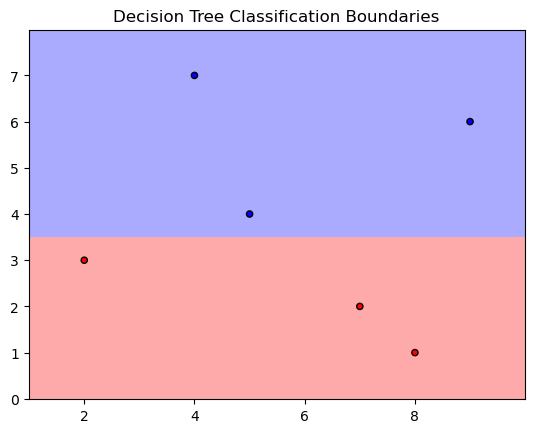

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Sample dataset for binary classification
X = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
y = np.array([0, 1, 1, 1, 0, 0])  # Binary labels (0 or 1)

# Train a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X, y)

# Plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title(title)
    plt.show()

# Plot decision boundaries of the trained tree
plot_decision_boundary(X, y, tree_classifier, 'Decision Tree Classification Boundaries')


**This code snippet visualizes the decision boundaries of the trained decision tree on a 2D dataset. Keep in mind that this is a simplified example, and in real-world scenarios, decision trees can handle higher-dimensional feature spaces and more complex decision boundaries.**

Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a
classification model.

#### Explanation:

**A confusion matrix is a table that summarizes the performance of a classification model. It is especially useful for evaluating the performance of a model in binary or multiclass classification problems. The confusion matrix provides a clear breakdown of the model's predictions in terms of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) instances.**

##### Here are the key elements of a confusion matrix:

- True Positive (TP): Instances that are actually positive and were correctly predicted as positive by the model.
- True Negative (TN): Instances that are actually negative and were correctly predicted as negative by the model.
- False Positive (FP): Instances that are actually negative but were incorrectly predicted as positive by the model (Type I error).
- False Negative (FN): Instances that are actually positive but were incorrectly predicted as negative by the model (Type II error).

**The confusion matrix is arranged as follows:**

In [ ]:
                | Predicted Negative | Predicted Positive |
Actual Negative |        TN          |        FP          |
Actual Positive |        FN          |        TP          |


**The confusion matrix provides a more detailed understanding of the model's performance than accuracy alone. It can be used to calculate various metrics such as precision, recall, F1 score, and specificity.**

#### Python Code Example:

##### Here's a Python code snippet demonstrating how to compute and display a confusion matrix using scikit-learn:

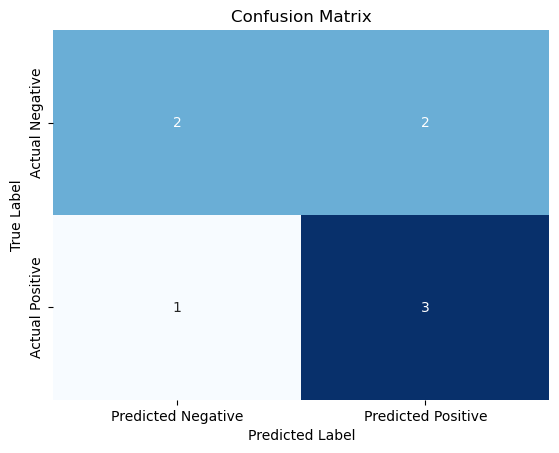

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example true labels and predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 1, 1, 0, 0, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**This code uses the "confusion_matrix" function from scikit-learn to calculate the confusion matrix and then visualizes it using a heatmap with the help of the "seaborn" library. The diagonal elements of the matrix represent correct predictions, while off-diagonal elements represent errors.**

Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be
calculated from it.

#### Explanation:

**A confusion matrix is a table that summarizes the performance of a classification model, breaking down predictions into categories such as true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). From the confusion matrix, various metrics like precision, recall, and F1 score can be derived.**

##### Here's an example confusion matrix:

In [ ]:
                | Predicted Negative | Predicted Positive |
Actual Negative |        20          |        5           |
Actual Positive |        3           |        12          |

**In this matrix:**

- TP (True Positive): 12 instances were correctly predicted as positive.
- TN (True Negative): 20 instances were correctly predicted as negative.
- FP (False Positive): 5 instances were predicted as positive but are actually negative.
- FN (False Negative): 3 instances were predicted as negative but are actually positive.

#### Calculating Metrics:

### Precision:

- Precision measures the accuracy of the positive predictions and is calculated as TP / (TP + FP).
- In the example, precision would be 12 / (12 + 5) ≈ 0.706.

#### Recall (Sensitivity or True Positive Rate):

- Recall measures the ability of the model to capture all the positive instances and is calculated as TP / (TP + FN).
- In the example, recall would be 12 / (12 + 3) ≈ 0.800.
### F1 Score:

- F1 score is the harmonic mean of precision and recall and is calculated as 2 * (Precision * Recall) / (Precision + Recall).
- In the example, F1 score would be 2 * (0.706 * 0.800) / (0.706 + 0.800) ≈ 0.750.

**Python Code Example:**
##### Here's a Python code snippet demonstrating how to calculate precision, recall, and F1 score from a confusion matrix:

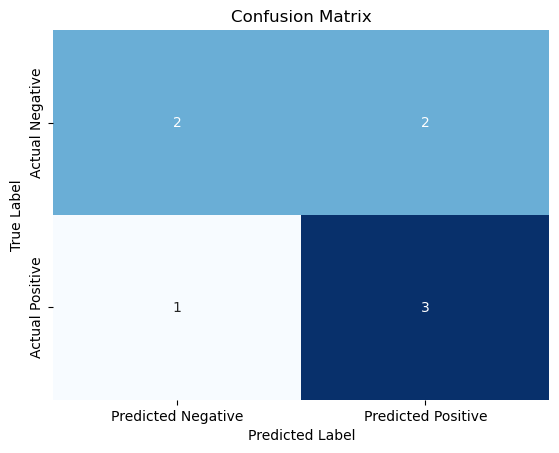

Precision: 0.600
Recall: 0.750
F1 Score: 0.667


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example true labels and predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 1, 1, 0, 0, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display precision, recall, and F1 score
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')


Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and
explain how this can be done.

#### Explanation:

- Choosing an appropriate evaluation metric for a classification problem is crucial because different metrics highlight different aspects of model performance. The choice depends on the specific goals, characteristics of the problem, and the potential consequences of different types of errors. Common classification evaluation metrics include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC).

##### Importance of Choosing an Appropriate Metric:

##### Accuracy Alone May Be Misleading:

- Accuracy, the ratio of correctly predicted instances to the total instances, is not always sufficient. It can be misleading, especially in imbalanced datasets where one class is dominant.
- In imbalanced datasets, a model predicting the majority class most of the time may still achieve high accuracy but might perform poorly on the minority class.

##### Consideration of False Positives and False Negatives:

- Precision and recall provide a more nuanced understanding of a model's performance by considering false positives and false negatives separately.
- Precision is important when minimizing false positives is critical, and recall is important when minimizing false negatives is crucial.

##### Trade-offs and Imbalanced Datasets:

- Depending on the application, there may be a trade-off between precision and recall. For example, in a medical diagnosis scenario, a model with high recall might be preferred to avoid missing positive cases, even at the cost of more false positives.

##### Application-Specific Metrics:

- Some applications have specific requirements that dictate the choice of metric. For instance, in fraud detection, precision (minimizing false positives) might be more critical than recall.

##### How to Choose an Appropriate Metric:

##### Understand the Problem Context:

- Understand the specific goals and requirements of the problem. Consider the consequences of false positives and false negatives in the context of the application.

##### Class Distribution:

- Examine the class distribution in the dataset. If the classes are imbalanced, consider metrics that account for this imbalance, such as precision, recall, or F1 score.

##### Business Impact:

- Consider the business impact of different types of errors. Identify which type of error is more costly or has more severe consequences for the specific application.

##### Explore Multiple Metrics:

- Evaluate the model using multiple metrics to get a comprehensive understanding of its performance. Visualize the trade-offs between metrics using precision-recall curves or ROC curves.

##### Python Code Example:

**Here's a simple example using scikit-learn to evaluate a model using accuracy, precision, recall, and F1 score:**

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Example true labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0])
y_pred = np.array([1, 0, 1, 1, 1, 0, 0, 1])

# Calculate and display different metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')


Confusion Matrix:
[[2 2]
 [1 3]]
Accuracy: 0.625
Precision: 0.600
Recall: 0.750
F1 Score: 0.667


Q8. Provide an example of a classification problem where precision is the most important metric, and
explain why.

#### Explanation:

- Consider a scenario where a model is used to predict whether an email is spam or not (ham). In this context, precision becomes a crucial metric because minimizing false positives is a high priority.

#### Explanation:

##### Scenario:

- In email filtering, a false positive occurs when a legitimate email is incorrectly classified as spam. This can lead to important emails being missed by the user.

##### Importance of Precision:

- Precision is the ratio of true positives to the total predicted positives (precision = TP / (TP + FP)).
- In this context, precision represents the accuracy of the model in correctly identifying spam emails, minimizing the number of legitimate emails marked as spam.

##### Consequences of False Positives:

- False positives in email filtering can have significant consequences. If an important email (e.g., work-related, personal communication) is incorrectly marked as spam, it may lead to missed opportunities, communication breakdowns, or delays in critical information.

##### Objective:

- The primary objective in this scenario is to ensure that the emails classified as spam are indeed spam, with minimal false positives.
- Maximizing precision helps achieve this goal by reducing the chances of marking legitimate emails as spam.

##### Precision-Recall Trade-off:

- While precision is emphasized, it's essential to consider the trade-off with recall. Emphasizing precision might lead to an increase in false negatives (spam emails incorrectly classified as non-spam), potentially allowing some spam emails to go through.

##### Python Code Example:

- Here's a simple example demonstrating the calculation of precision in a spam classification scenario:

In [2]:
from sklearn.metrics import precision_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Example true labels and predicted labels for spam classification
y_true = np.array([0, 1, 0, 0, 1, 1, 0, 0])  # 0: Non-spam, 1: Spam
y_pred = np.array([0, 1, 0, 1, 1, 0, 0, 0])

# Calculate precision
precision = precision_score(y_true, y_pred)

# Display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display precision
print(f'Precision: {precision:.3f}')


Confusion Matrix:
[[4 1]
 [1 2]]
Precision: 0.667


Q9. Provide an example of a classification problem where recall is the most important metric, and explain
why.

#### Explanation:

- Consider a scenario in medical diagnosis where the model is used to predict whether a patient has a rare but severe disease. In this context, recall becomes the most important metric because minimizing false negatives is a high priority.

#### Explanation:

##### Scenario:

- In medical diagnosis, a false negative occurs when a patient with the disease is incorrectly classified as not having the disease. This can have severe consequences, especially for rare but severe diseases.

##### Importance of Recall:

- Recall (sensitivity) is the ratio of true positives to the total actual positives (recall = TP / (TP + FN)).
- In this context, recall represents the ability of the model to correctly identify patients with the disease, minimizing the chances of missing true positive cases.

##### Consequences of False Negatives:

- False negatives in medical diagnosis can have serious consequences, as they may result in a delayed diagnosis or treatment for patients with the disease. Timely detection of the disease is crucial for better outcomes.

##### Objective:

- The primary objective in this scenario is to ensure that patients with the disease are correctly identified, even if it means accepting a higher number of false positives.
- Maximizing recall helps achieve this goal by reducing the chances of missing actual positive cases.

##### Recall-Precision Trade-off:

- While recall is emphasized, it's essential to consider the trade-off with precision. Emphasizing recall might lead to an increase in false positives (patients without the disease being incorrectly classified as positive), potentially resulting in unnecessary interventions or treatments.

##### Python Code Example:

- Here's a simple example demonstrating the calculation of recall in a medical diagnosis scenario:

In [3]:
from sklearn.metrics import recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Example true labels and predicted labels for medical diagnosis
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 1])  # 1: Disease, 0: No Disease
y_pred = np.array([1, 1, 0, 1, 1, 1, 0, 1])

# Calculate recall
recall = recall_score(y_true, y_pred)

# Display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display recall
print(f'Recall: {recall:.3f}')


Confusion Matrix:
[[1 2]
 [1 4]]
Recall: 0.800
